In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from utils import create_model
from tensorflow.keras.losses import CategoricalCrossentropy

In [2]:
# model = load_model('weights/mobilenet_modele.h5')

model = create_model()
model.load_weights('logs/11-12-2020-19-47-22/model_checkpoints')

model.summary()

test_directory = 'DB/train'

test_datagen = ImageDataGenerator(rescale=1./255)
test_batches = test_datagen.flow_from_directory(
        test_directory,
        target_size=(224,224),
        batch_size=1,
        color_mode="rgb",
        class_mode='categorical',
        shuffle=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1000)              3538984   
_________________________________________________________________
predictions (Dense)          (None, 5)                 5005      
Total params: 3,543,989
Trainable params: 3,509,877
Non-trainable params: 34,112
_________________________________________________________________
Found 4736 images belonging to 5 classes.


In [3]:
# y_pred_raw = model.predict(test_batches)
# y_pred = np.argmax(y_pred_raw, axis=1)
# y_true = test_batches.classes

# print(y_true, y_pred)

In [4]:
# sum([x!=y for x, y in zip(y_true, y_pred)])

In [5]:
# num_classes = 5
# num_images_per_class = 10

# y = np.zeros((num_classes, num_images_per_class, 224, 224, 3))
# losses = np.zeros((num_classes, num_images_per_class))

# np.where(losses[0] < 1)[0][0]

In [14]:
# !pip install tqdm
len(test_batches.labels)

4736

In [21]:
np.argmax([[0,1,0,0,0]])

4

In [25]:
from tqdm import tqdm
num_classes = 5
num_images_per_class = 10
scce = CategoricalCrossentropy()

images = np.zeros((num_classes, num_images_per_class, 224, 224, 3))
miss_label = np.full((num_classes, num_images_per_class), -1)
true_label = np.full((num_classes, num_images_per_class), -1)
losses = np.full((num_classes, num_images_per_class), -np.inf)

total = len(test_batches.labels)

for idx, (img, label) in tqdm(enumerate(test_batches), total=total):
    pred = model.predict(img)
    # print(pred.shape, label.shape)

    lbl = np.argmax(label)
    score = scce(label, pred).numpy()
    if any(losses[lbl] < score):
        index = np.where(losses[lbl] < score)[0][0]
        losses[lbl][index] = score
        images[lbl][index] = img
        miss_label[lbl][index] = np.argmax(pred)

    if idx >= total: break

100%|██████████| 4736/4736 [04:23<00:00, 17.96it/s]


In [48]:
np.uint8(img*255)

array([[[[ 39,  29,  17],
         [ 42,  32,  20],
         [ 48,  38,  28],
         ...,
         [ 97,  78,  63],
         [100,  81,  67],
         [100,  83,  67]],

        [[ 40,  31,  27],
         [ 39,  30,  26],
         [ 39,  30,  23],
         ...,
         [ 98,  79,  67],
         [ 98,  81,  68],
         [ 98,  82,  67]],

        [[ 35,  28,  26],
         [ 39,  32,  30],
         [ 45,  38,  33],
         ...,
         [ 94,  79,  64],
         [ 96,  81,  65],
         [ 99,  82,  64]],

        ...,

        [[ 94,  79,  50],
         [ 95,  78,  52],
         [ 96,  77,  52],
         ...,
         [ 42,  33,  25],
         [ 43,  34,  22],
         [ 44,  36,  23]],

        [[ 93,  77,  52],
         [ 94,  77,  53],
         [ 94,  77,  53],
         ...,
         [ 42,  34,  23],
         [ 41,  35,  24],
         [ 44,  38,  25]],

        [[ 90,  75,  53],
         [ 92,  76,  54],
         [ 93,  75,  54],
         ...,
         [ 43,  35,  24],
        

In [28]:
np.concatenate(images, axis=0).shape

(50, 224, 224, 3)

In [36]:
new_images = np.stack(images.)

In [29]:
from PIL import Image

In [52]:
miss_label[1][0]

0

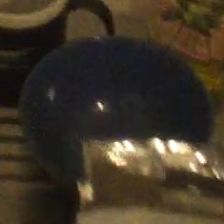

In [49]:
Image.fromarray(np.uint8(images[0][0]*255))

In [ ]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

get_concat_h(im1, im1).save('data/dst/pillow_concat_h.jpg')
get_concat_v(im1, im1).save('data/dst/pillow_concat_v.jpg')

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np


fig = plt.figure(figsize=(num_classes, num_images_per_class))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(num_classes, num_images_per_class),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

array([[[0.42352945, 0.34509805, 0.227451  ],
        [0.43137258, 0.35294119, 0.23137257],
        [0.41176474, 0.33333334, 0.21568629],
        ...,
        [0.25490198, 0.20000002, 0.10196079],
        [0.24313727, 0.18823531, 0.09019608],
        [0.23529413, 0.18039216, 0.08235294]],

       [[0.40784317, 0.34509805, 0.21568629],
        [0.4039216 , 0.34117648, 0.21176472],
        [0.40000004, 0.32941177, 0.20392159],
        ...,
        [0.25490198, 0.20784315, 0.10588236],
        [0.25882354, 0.21176472, 0.10980393],
        [0.26666668, 0.21960786, 0.11764707]],

       [[0.40784317, 0.34509805, 0.21960786],
        [0.40000004, 0.33725491, 0.21176472],
        [0.40000004, 0.32549021, 0.20392159],
        ...,
        [0.25490198, 0.20784315, 0.10196079],
        [0.25490198, 0.20784315, 0.10980393],
        [0.25882354, 0.21176472, 0.10980393]],

       ...,

       [[0.31764707, 0.25490198, 0.14117648],
        [0.32156864, 0.25490198, 0.14509805],
        [0.32156864, 0

In [ ]:
# y_true = [[0, 1, 0]]
# y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# # Using 'auto'/'sum_over_batch_size' reduction type.
# cce = tf.keras.losses.CategoricalCrossentropy()
# cce(y_true, y_pred).numpy()

# >>> 0.1

# ce_scores = []

# for im in test_batches: